# Does the economy affect suicide rates?
## What is this?
 An exploration of suicide data from 1980 to 2016 in 128 countries reported in the WHO Mortality Database
 and how the reported suicide rates change with the economy
## Which countries have the higest suicide rates
 Two countries stands out on top of the chart: Hungary and Lithuania

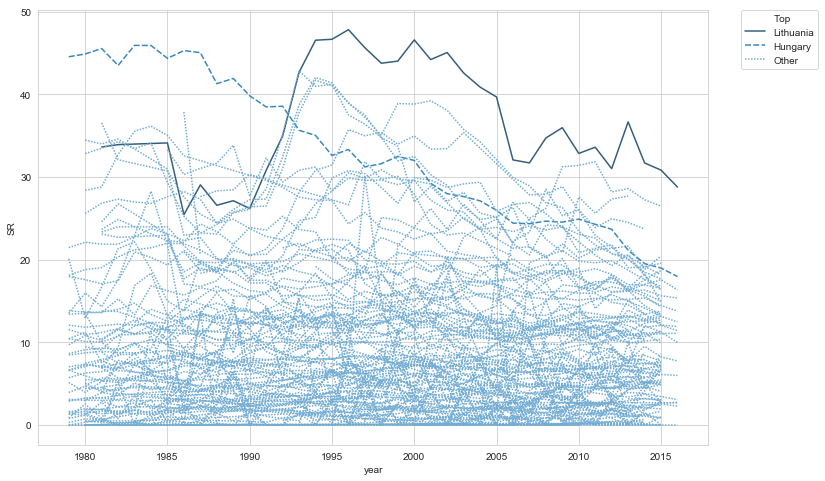

In [67]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
sns.lineplot(data=SR_country, x='year', y='SR', estimator=None, units='country', \
    hue='Top', hue_order=['Lithuania', 'Hungary', 'Other'], \
    style='Top', style_order=['Lithuania', 'Hungary', 'Other'], \
    palette=sns.color_palette('Blues_d', 3))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


 To find out what other countries have high suicide rates (SR), we tabulate the top 5 countries with the highst SR
 from 1980 to 2016 and then counted how many times each country appears.

In [68]:
top5=dict() #Record the rank of the top 5 countries by year
top5_ctr=dict() #Tabulate the counts for each country
tmp=list()
for year in range(1980,2017):
    top5[year]=list(SR_country[SR_country['year']==year][['country', 'SR']].sort_values(by=['SR'],ascending=False).head(5)['country'])
    for country in top5[year]:
        SR=SR_country[(SR_country['year']==year) & (SR_country['country']==country)][['SR']].iloc[0,0]
        tmp.append([country, year, SR])
        if country in top5_ctr.keys():
            top5_ctr[country]=top5_ctr[country]+1
        else:
            top5_ctr[country]=1
top5_data=pd.DataFrame(tmp, columns=['country','year','SR'])
del tmp, SR
top5_count=pd.DataFrame(sorted(top5_ctr.items(), key=lambda kv: kv[1], reverse=True), columns=['country','count'])


 Hungary ranked the highest in SR from 1980 to 1992. In 1993, Latvia rose to the top (SR=42.87), with Lithuania as a close second (SR=42.69).
 Starting from 1994 onwards, Lithuania remained on the top of the chart.

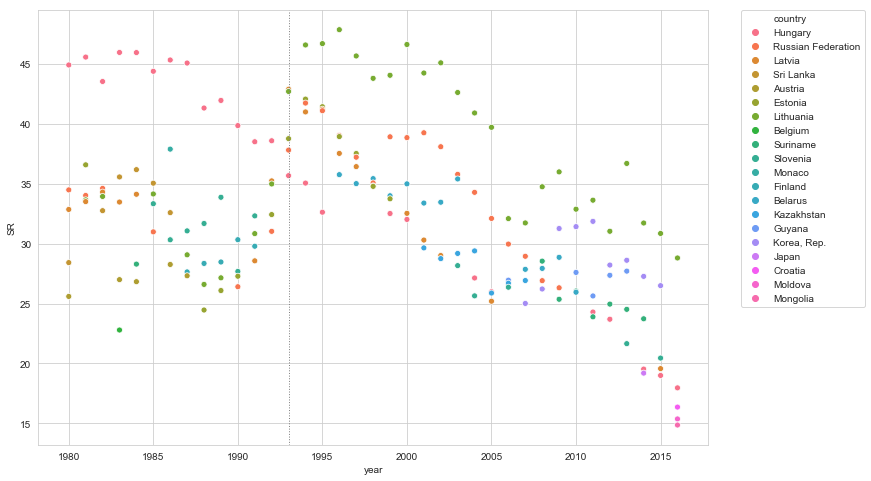

In [69]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=top5_data, x='year', y='SR', estimator=None, units='country', hue='country')
plt.axvline(x=1993, linewidth=1, linestyle=':', color='grey')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


 The countries that frequently rank in the top 5 include (but are not limited to) Lithuania, Russia, Hungary, Latvia,
 Belarus, Slovenia, and Estonia. Only two East Esian Countries made it to the list -- Korea and Japan.

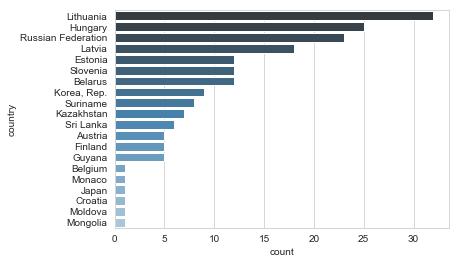

In [70]:
sns.barplot(data=top5_count, x='count', y='country', orient='h', palette="Blues_d")
#print(sorted(top5_ctr.items(), key=lambda kv: kv[1], reverse=True))
